# Check River Climatology

In [64]:
from __future__ import division

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import nc_tools

%matplotlib inline

In [65]:
def find_points(flow):
    for i in range(390,435):
        for j in range(280,398):
            if flow[i,j] > 0:
                print i,j, lat[i,j], lon[i,j], flow[i,j]

In [66]:
grid = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
lat = grid.variables['nav_lat'][:,:]
lon = grid.variables['nav_lon'][:,:]
depth = grid.variables['Bathymetry'][:]

In [67]:
river = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/rivers/rivers_month.nc')
print river.variables['rorunoff'][:].shape

(12, 898, 398)


In [68]:
print 'Apr'
find_points(river.variables['rorunoff'][4,:,:])
print 'May'
find_points(river.variables['rorunoff'][5,:,:])

Apr
411 324 49.0993995667 -123.083885193 0.65822
412 324 49.1033248901 -123.087242126 0.65822
414 334 49.1300430298 -123.041992188 6.58978
415 334 49.1339645386 -123.045349121 6.58978
416 334 49.1378898621 -123.048713684 6.58978
434 318 49.1783180237 -123.192321777 0.660519
May
411 324 49.0993995667 -123.083885193 0.93152
412 324 49.1033248901 -123.087242126 0.93152
414 334 49.1300430298 -123.041992188 9.32592
415 334 49.1339645386 -123.045349121 9.32592
416 334 49.1378898621 -123.048713684 9.32592
434 318 49.1783180237 -123.192321777 0.934773


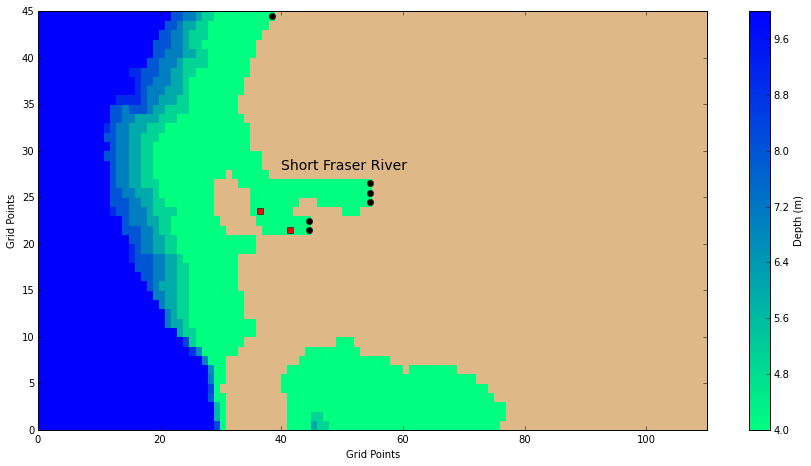

In [69]:
ik = 425; jk = 302; d = 6
fig, ax = plt.subplots(1,1,figsize=(15,7.5))
imin = 390; imax = 435; jmin = 280; jmax = 398
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(depth[imin:imax,jmin:jmax], vmax = 10., cmap=cmap)
ax.set_xlim((0,110))
ax.set_xlabel('Grid Points')
ax.set_ylabel('Grid Points')
ax.text(40, 28, "Short Fraser River", fontsize=14)
cbar=fig.colorbar(mesh)
cbar.set_label('Depth (m)')
ax.plot(np.array((324,324,334,334,334,318))-jmin+0.5,np.array((411,412,414,415,416,434))-imin+0.5,'ko');
ax.plot(np.array((322-1,318-2))-jmin+0.5,np.array((412-1,414-1))-imin+0.5,'rs');

In [71]:
data = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/NEMO36_Tides/base_run/E1/SalishSea_1d_20030421_20030424_grid_T.nc')
nc_tools.show_variables(data)

[u'nav_lat', u'nav_lon', u'deptht', u'deptht_bounds', u'sossheig', u'time_centered', u'time_centered_bounds', u'time_counter', u'time_counter_bounds', u'votemper', u'vosaline']


In [72]:
S = data.variables['vosaline'][:]
print S.shape

(4, 40, 898, 398)


/homes/anu/sallen/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


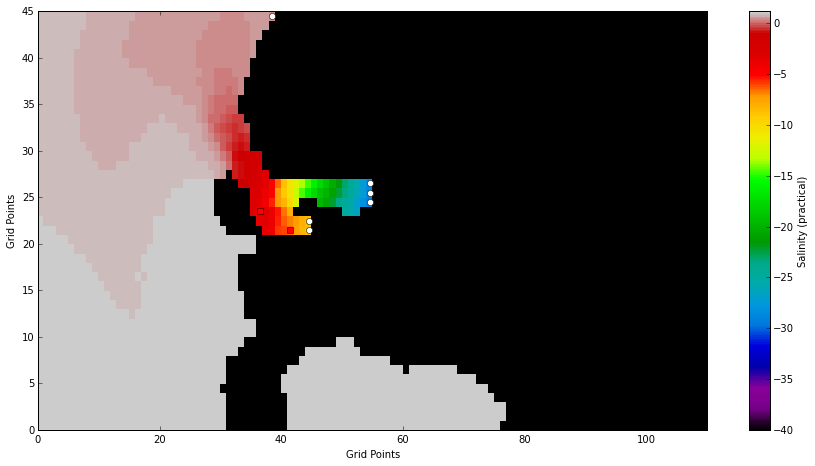

In [73]:
t=3; d = 0
imin = 390; imax = 435; jmin = 280; jmax = 398
lS = np.log10(S[t,d,imin:imax,jmin:jmax])
fig, ax = plt.subplots(1,1,figsize=(15,7.5))
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(lS, vmax=1.2, vmin=-40, cmap=cmap)
ax.set_xlim((0,110))
ax.set_xlabel('Grid Points')
ax.set_ylabel('Grid Points')
ax.text(40, 28, "Short Fraser River", fontsize=14)
cbar=fig.colorbar(mesh)
cbar.set_label('Salinity (practical)')
ax.plot(np.array((324,324,334,334,334,318))-jmin+0.5,np.array((411,412,414,415,416,434))-imin+0.5,'wo');
ax.plot(np.array((322-1,318-2))-jmin+0.5,np.array((412-1,414-1))-imin+0.5,'rs');

In [74]:
datau = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/NEMO36_Tides/base_run/E1/SalishSea_1d_20030421_20030424_grid_U.nc')
u = datau.variables['vozocrtx'][:]

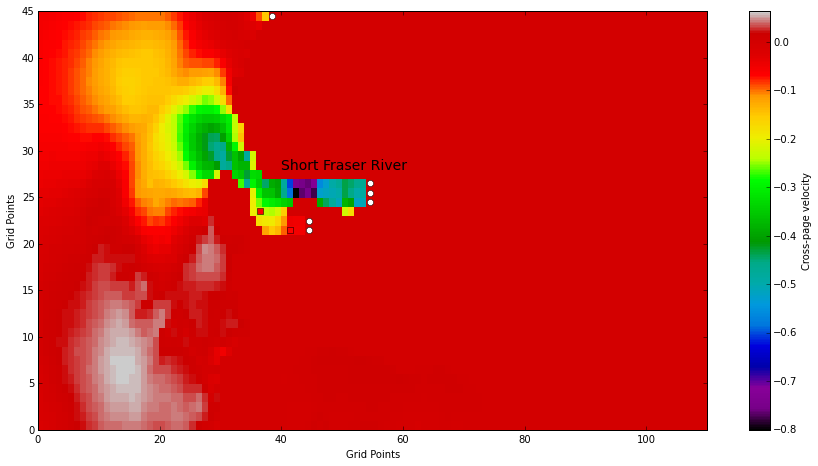

In [75]:
t = 3; d = 0
imin = 390; imax = 435; jmin = 280; jmax = 398
fig, ax = plt.subplots(1,1,figsize=(15,7.5))
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(u[t,d,imin:imax,jmin:jmax], cmap=cmap)
ax.set_xlim((0,110))
ax.set_xlabel('Grid Points')
ax.set_ylabel('Grid Points')
ax.text(40, 28, "Short Fraser River", fontsize=14)
cbar=fig.colorbar(mesh)
cbar.set_label('Cross-page velocity')
ax.plot(np.array((324,324,334,334,334,318))-jmin+0.5,np.array((411,412,414,415,416,434))-imin+0.5,'wo');
ax.plot(np.array((322-1,318-2))-jmin+0.5,np.array((412-1,414-1))-imin+0.5,'rs');

In [76]:
datav = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/NEMO36_Tides/base_run/E1/SalishSea_1d_20030421_20030424_grid_V.nc')
v = datav.variables['vomecrty'][:]

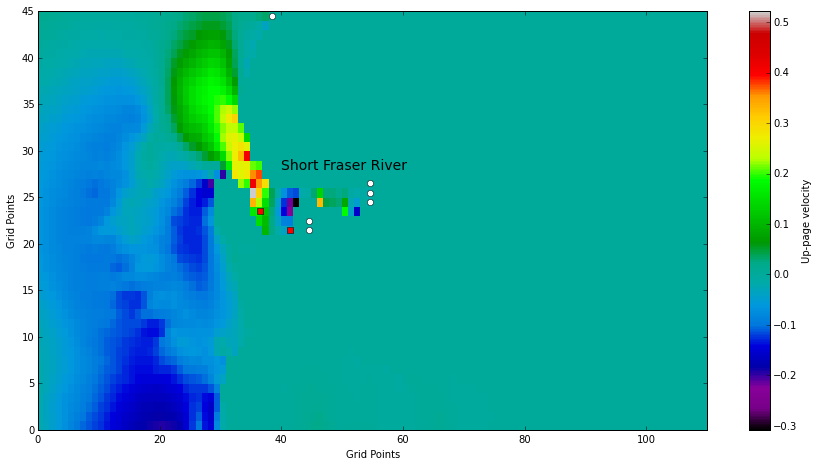

In [77]:
t = 3; d = 0
imin = 390; imax = 435; jmin = 280; jmax = 398
fig, ax = plt.subplots(1,1,figsize=(15,7.5))
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(v[t,d,imin:imax,jmin:jmax], cmap=cmap)
ax.set_xlim((0,110))
ax.set_xlabel('Grid Points')
ax.set_ylabel('Grid Points')
ax.text(40, 28, "Short Fraser River", fontsize=14)
cbar=fig.colorbar(mesh)
cbar.set_label('Up-page velocity')
ax.plot(np.array((324,324,334,334,334,318))-jmin+0.5,np.array((411,412,414,415,416,434))-imin+0.5,'wo');
ax.plot(np.array((322-1,318-2))-jmin+0.5,np.array((412-1,414-1))-imin+0.5,'rs');

In [78]:
ssh =  data.variables['sossheig'][:]

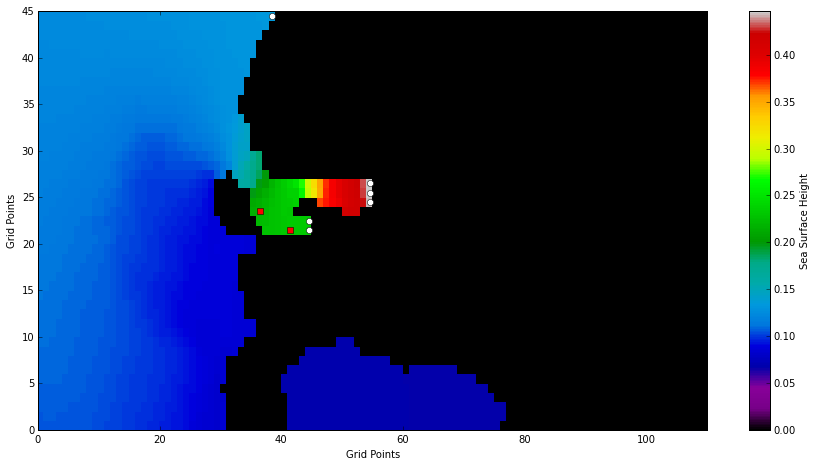

In [79]:
imin = 390; imax = 435; jmin = 280; jmax = 398
fig, ax = plt.subplots(1,1,figsize=(15,7.5))
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(ssh[t,imin:imax,jmin:jmax], cmap=cmap)
ax.set_xlim((0,110))
ax.set_xlabel('Grid Points')
ax.set_ylabel('Grid Points')
ax.text(40, 28, "Short Fraser River", fontsize=14)
cbar=fig.colorbar(mesh)
cbar.set_label('Sea Surface Height')
ax.plot(np.array((324,324,334,334,334,318))-jmin+0.5,np.array((411,412,414,415,416,434))-imin+0.5,'wo');
ax.plot(np.array((322-1,318-2))-jmin+0.5,np.array((412-1,414-1))-imin+0.5,'rs');

In [80]:
# point of interest is 413, 317
print S[0,0,413,317], S[0,1,413,317]

8.05899e-05 5.74376e-05


In [81]:
print u[0,0,413,317], S[0,0,413,318]

-0.245697 7.27951e-05


In [82]:
print u[0,0,413,316], S[0,0,413,316]

-0.233229 6.46897e-05


In [83]:
print v[0,0,413,317], S[0,0,414,317]

0.132482 0.000106054


In [84]:
print v[0,0,412,317], S[0,0,412,317]

0.119515 4.91381e-05


In [85]:
print -u[0,0,413,317]*S[0,0,413,318]+u[0,0,413,316]*S[0,0,413,316]
print -v[0,0,413,317]*S[0,0,414,317]+v[0,0,412,317]*S[0,0,412,317]

2.79804e-06
-8.17751e-06
